Antes de removido 
 book_id    0
user_id    0
rating     0
dtype: int64
Depois de removido 
 book_id    0
user_id    0
rating     0
dtype: int64
Usuarios selecionados:  Index([11691, 13794, 10140, 11927, 11692, 11285], dtype='int64', name='user_id')
Dataset antes:  (300, 3)
Dataset depois:  (44, 3)


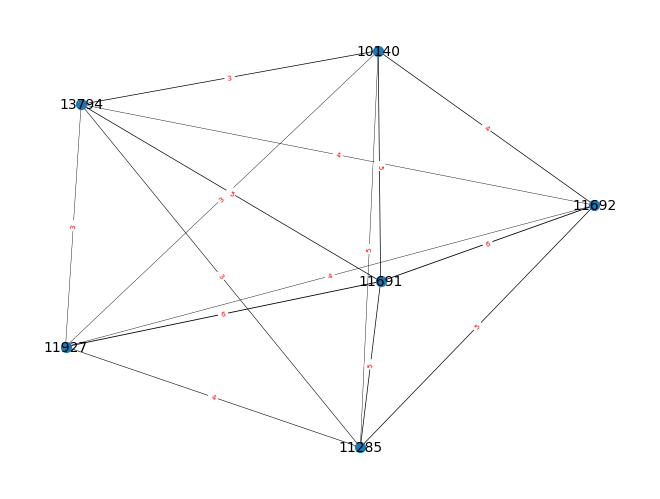

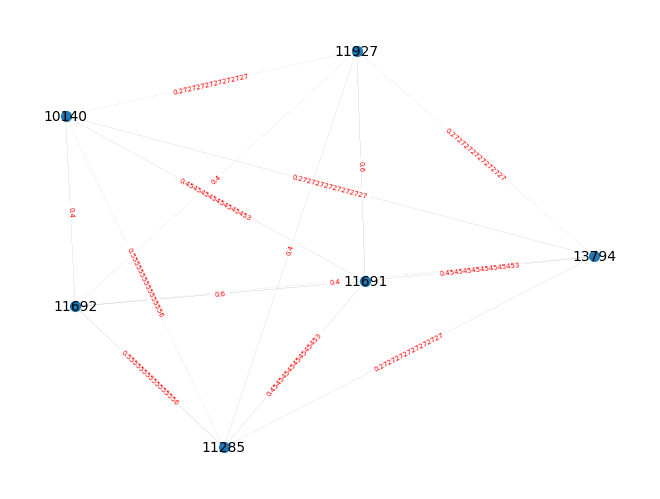

Arvore geradora MINIMA abaixo


C:\Users\Jullia\AppData\Local\Temp\ipykernel_13280\3043934552.py:206: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(minimum_spanning_tree, pos, edge_color="green", width=2)


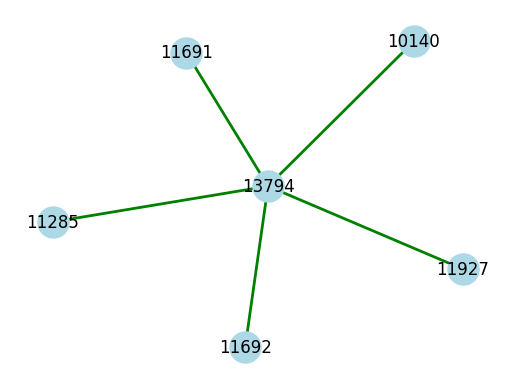

LISTA DE ARESTAS DA  PERCORRIDAS NA AROVRE PELA BFS A PARTIR DE UM NÓ INICIAL PASSADO: [(13794, 10140), (13794, 11927), (13794, 11285), (13794, 11692), (13794, 11691)]


C:\Users\Jullia\AppData\Local\Temp\ipykernel_13280\3043934552.py:245: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(minimum_spanning_tree, pos, edge_color="green", width=2)


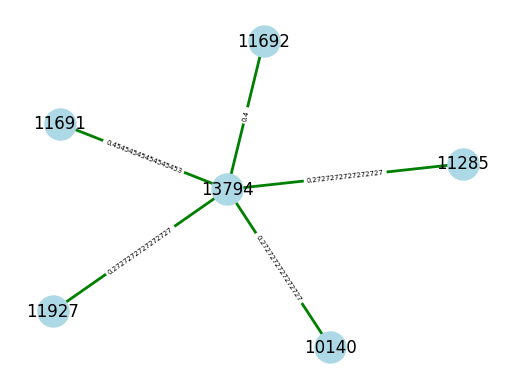

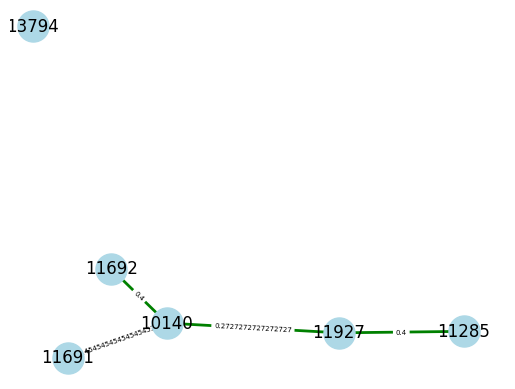

Um ou mais nós ficaram isolados na árvore mínima. Parando a geração da árvore.


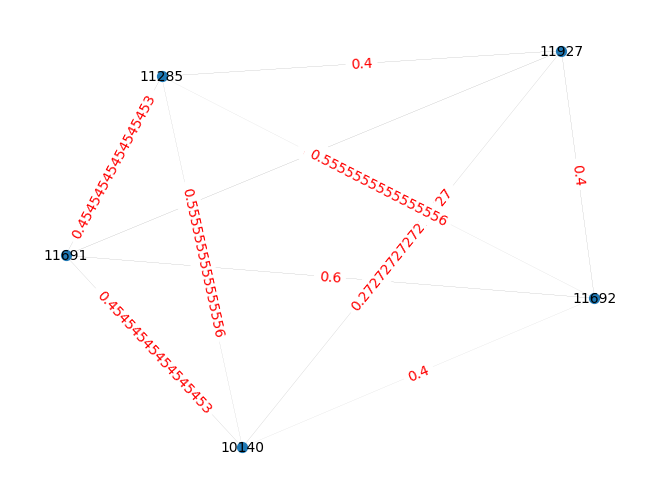

In [8]:
##Codigo acima mas organizado
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

books = pd.read_csv('DdosReduzidos300.csv', low_memory=False, delimiter=';') #o low memory é pq o arquivo é muito grande e ai o panda n precisa identificar cada variavel, se ele nao identificar ele colcoa como string, Deixa mais rapido
books.head(3)

#Selecionando as variaveis que vao ser utlizadas
books = books[['book_id', 'user_id', 'rating' ]]

print("Antes de removido \n", books.isna().sum()) 

#removendo se tivesse valores nulos
books.dropna(inplace=True)

print("Depois de removido \n", books.isna().sum()) 

#verificando a quantidade de avaliações por usuários
books['user_id'].value_counts()

# print(books['user_id'].value_counts())
with open("NumRating.txt", "w") as f:
    f.write(books['user_id'].value_counts().to_string())


#pegando os usuarios que fizeram mais de 3 avaliações
qt_rating = books['user_id'].value_counts() >= 7 ##Vai ter True onde for maior ou igual a 5, e vai ter False onde nao é
y = qt_rating[qt_rating].index ##Isso: qt_rating[qt_rating], é pq ele pega so os que estao com a posição como True, o '.index' é usado para obter os índices desses elementos na série original, que no caso é o 'user_id'.
y.shape ##Retorna uma tupla com informações sobre o tamanho desse índice


print("Usuarios selecionados: ", y)

#visualizando o tamanho do dataset
print("Dataset antes: ", books.shape)

#Pegando somente dos usuraios que avaliaram mais de 3 vezes mas agora no dataframe
books = books[books['user_id'].isin(y)]

print("Dataset depois: ", books.shape)

#######################################################################################
import networkx as nx
import matplotlib.pyplot as plt

def create_user_graph(users, books):
    G = nx.Graph()
    G.add_nodes_from(users)
    
    edge_weights = {}  # Inicialize o dicionário para armazenar os pesos das arestas
    
    for user1 in users:
        for user2 in users:
            if user1 != user2:
                books_user1 = set(books[books['user_id'] == user1]['book_id'])
                books_user2 = set(books[books['user_id'] == user2]['book_id'])
                common_books = books_user1.intersection(books_user2)
                if common_books:
                    weight = len(common_books)
                    G.add_edge(user1, user2, weight=weight)  # Adiciona o atributo 'weight' à aresta
                    edge_weights[(user1, user2)] = weight  # Armazena o peso no dicionário
    
    return G, edge_weights


# Cria o grafo
G, edge_weights = create_user_graph(y, books)

# Exemplo de layout para visualização
pos = nx.spring_layout(G)

# Obtenha os rótulos dos nós (ID dos usuários)
node_labels = {node: str(node) for node in G.nodes()}

# Obtenha os rótulos das arestas
edge_labels = {edge: weight for edge, weight in edge_weights.items()}

# Ajuste o tamanho das arestas com base nos pesos
edge_width = [0.1 * weight for weight in edge_weights.values()]

# Desenhe os nós com rótulos
nx.draw(G, pos, node_size=50, width=edge_width, with_labels=False)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')

# Desenhe os rótulos das arestas
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5, font_color='red')

# Mostre o gráfico
plt.axis('off')
plt.show()

##############################################################################################
# Função para calcular o coeficiente de Jaccard entre dois conjuntos
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    # print(f"books: {set1} e {set2}")
    # print(f"intersection: {intersection}")
    # print(f"union: {union}")
    # print(f"Jaccand: {intersection/union}")
    return intersection / union if union != 0 else 0

# Função para criar um grafo ponderado com base no coeficiente de Jaccard
def create_user_graph_with_jaccard(users, books):
    G = nx.Graph()
    G.add_nodes_from(users)
    
    edge_weights = {}  # Dicionário para armazenar os pesos das arestas
    
    for user1 in users:
        for user2 in users:
            if user1 != user2:
                books_user1 = set(books[books['user_id'] == user1]['book_id'])
                books_user2 = set(books[books['user_id'] == user2]['book_id'])
                # print(f"user1: {user1} e user2: {user2}")
                jaccard = jaccard_similarity(books_user1, books_user2)
                if jaccard > 0:  # Apenas considere pares com coeficiente de Jaccard maior que 0
                    edge_weights[(user1, user2)] = jaccard
                    
                    weight = jaccard
                    G.add_edge(user1, user2, weight=weight)
    
    return G, edge_weights


# Crie o grafo com coeficiente de Jaccard
GAux = G
GAux, edge_weights = create_user_graph_with_jaccard(y, books)

# Exemplo de layout para visualização
pos = nx.spring_layout(GAux)

# Obtenha os rótulos dos nós (ID dos usuários)
node_labels = {node: str(node) for node in GAux.nodes()}

# Obtenha os rótulos das arestas
edge_labels = {edge: weight for edge, weight in edge_weights.items()}

# Ajuste o tamanho das arestas com base nos pesos
edge_width = [0.1 * weight for weight in edge_weights.values()]

# Desenhe os nós com rótulos
nx.draw(GAux, pos, node_size=50, width=edge_width, with_labels=False)
nx.draw_networkx_labels(GAux, pos, labels=node_labels, font_size=10, font_color='black')

# Desenhe os rótulos das arestas
nx.draw_networkx_edge_labels(GAux, pos, edge_labels=edge_labels, font_size=5, font_color='red')

# Mostre o gráfico
plt.axis('off')
plt.show()



##############################################################################################

import networkx as nx

def build_maximum_spanning_tree(graph, start_node):
    T = nx.Graph()
    visited = [start_node]  # Use uma lista em vez de um conjunto

    while len(visited) < len(graph.nodes()):
        max_weight = -float('inf')
        max_edge = None

        for node in visited:
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    weight = graph[node][neighbor]['weight']
                    if weight > max_weight:
                        max_weight = weight
                        max_edge = (node, neighbor)

        if max_edge:
            u, v = max_edge
            T.add_edge(u, v, weight=max_weight)
            print(f"start_node: {start_node}")
            print(f"No inserido: {v}")
            visited.append(v)  # Adicione a borda ao final da lista
            print(f"{visited}")
    return T

#####################################################################
# Escolha um nó inicial
# GMst = G

GMst = GAux
start_node = y[0]  # Por exemplo, você pode escolher o primeiro nó na sua lista de usuários selecionados (y)

#ARVORE MINIMA 
minimum_spanning_tree = nx.minimum_spanning_tree(GMst) ##Feita com função da biblioteca Nx
# minimum_spanning_tree = nx.maximum_spanning_tree(GMst)


# Visualize a Árvore Geradora Mínima
print("Arvore geradora MINIMA abaixo")
pos = nx.spring_layout(minimum_spanning_tree)

# Desenhe os nós
nx.draw_networkx_nodes(minimum_spanning_tree, pos, node_color="lightblue", node_size=500)

# Desenhe as arestas da Árvore Geradora Máxima
nx.draw_networkx_edges(minimum_spanning_tree, pos, edge_color="green", width=2)


# Desenhe os rótulos dos nós
node_labels = {node: node for node in minimum_spanning_tree.nodes()}
nx.draw_networkx_labels(minimum_spanning_tree, pos, labels=node_labels, font_size=12, font_family="sans-serif")

plt.axis("off")
plt.show()

# print(nx.dfs_edges(maximum_spanning_tree, source=start_node).nodes)
lista = list(nx.bfs_edges(minimum_spanning_tree, source=13794))
print(f"LISTA DE ARESTAS DA  PERCORRIDAS NA AROVRE PELA BFS A PARTIR DE UM NÓ INICIAL PASSADO: {lista}")

###########################################################################################333
## MESMO DO DE CIMA MAS COM O PESO DA ARESTAS APARECENDO
import networkx as nx
import matplotlib.pyplot as plt

# Crie uma cópia do grafo original
# copied_graph = G.copy()
copied_graph = GAux.copy()

while len(copied_graph.nodes()) >= len(G.nodes()):
    # Aplique a árvore geradora mínima na cópia do grafo
    minimum_spanning_tree = nx.minimum_spanning_tree(copied_graph)
    # minimum_spanning_tree = nx.maximum_spanning_tree(copied_graph)

    # Verifique se há nós isolados na árvore mínima
    isolated_nodes = [node for node in copied_graph.nodes() if not any(edge in minimum_spanning_tree.edges() for edge in copied_graph.edges(node))]

    # Visualize a Árvore Geradora Mínima até o momento com pesos das arestas
    pos = nx.spring_layout(minimum_spanning_tree)
    edge_labels = {(u, v): d["weight"] for u, v, d in minimum_spanning_tree.edges(data=True)}
    
    # Desenhe os nós
    nx.draw_networkx_nodes(minimum_spanning_tree, pos, node_color="lightblue", node_size=500)

    # Desenhe as arestas da Árvore Geradora Máxima com pesos
    nx.draw_networkx_edges(minimum_spanning_tree, pos, edge_color="green", width=2)
    nx.draw_networkx_edge_labels(minimum_spanning_tree, pos, edge_labels=edge_labels, font_size=5)

    # Desenhe os rótulos dos nós
    node_labels = {node: node for node in minimum_spanning_tree.nodes()}
    nx.draw_networkx_labels(minimum_spanning_tree, pos, labels=node_labels, font_size=12, font_family="sans-serif")

    plt.axis("off")
    plt.show()

    if isolated_nodes:
        print("Um ou mais nós ficaram isolados na árvore mínima. Parando a geração da árvore.")
        break

    # Identifique os vértices e arestas na árvore geradora mínima
    mst_edges = list(minimum_spanning_tree.edges())
    mst_nodes = list(minimum_spanning_tree.nodes())

    # Remova os vértices e arestas da árvore geradora mínima do grafo copiado
    copied_graph.remove_edges_from(mst_edges)
    copied_graph.remove_nodes_from(set(copied_graph.nodes()) - set(mst_nodes))

## EXCLUI O NÓ QUE NÃO ESTA CONECTADO NO GRAFO E PRINTA O GRAFO SEM ELE
import networkx as nx
import matplotlib.pyplot as plt

# Encontre nós isolados
isolated_nodes = list(nx.isolates(copied_graph))

# Remova os nós isolados do grafo
copied_graph.remove_nodes_from(isolated_nodes)

# Exemplo de layout para visualização
pos_copied = nx.spring_layout(copied_graph)

# Obtenha os rótulos dos nós (ID dos usuários)
node_labels = {node: str(node) for node in copied_graph.nodes()}

# Obtenha os rótulos das arestas
edge_labels = {edge: weight for edge, weight in edge_weights.items() if edge in copied_graph.edges()}

# Ajuste o tamanho das arestas com base nos pesos
edge_width = [0.1 * weight for weight in edge_labels.values()]

# Desenhe os nós com rótulos
nx.draw(copied_graph, pos_copied, node_size=50, width=edge_width, with_labels=False)
nx.draw_networkx_labels(copied_graph, pos_copied, labels=node_labels, font_size=10, font_color='black')

# Desenhe os rótulos das arestas
nx.draw_networkx_edge_labels(copied_graph, pos_copied, edge_labels=edge_labels, font_size=10, font_color='red')

# Mostre o gráfico
plt.axis('off')
plt.show()


In [10]:
# Exemplo: Recomendar livros com base em usuários semelhantes com similaridade maior ou igual a 0.3
def recommend_books(user_id, books, GAux, edge_weights, num_recommendations, min_similarity):
    if user_id in GAux.nodes():
        similar_users = [node for node in GAux.neighbors(user_id)]
        book_ids = set(books[books['user_id'] == user_id]['book_id'])
        recommendations = []

        for user in similar_users:
            user_books = set(books[books['user_id'] == user]['book_id'])
            common_books = user_books.difference(book_ids)
            similarity = edge_weights.get((user_id, user), 0)  # Obtém a similaridade de Jaccard entre os usuários
            
            if similarity >= min_similarity:  # Considere apenas pares com similaridade maior ou igual a min_similarity
                for book in common_books:
                    recommendations.append((book, similarity))
        
        recommendations.sort(key=lambda x: x[1], reverse=True)
        
        return [book for book, _ in recommendations[:num_recommendations]]
    else:
        print("Usuario não se encontra")

# Exemplo de recomendação para um usuário
user_id_to_recommend = 13794  # Substitua pelo ID do usuário desejado
recommended_books = recommend_books(user_id_to_recommend, books, copied_graph, edge_weights, num_recommendations=3, min_similarity=0.3)
print("Recomendações para o usuário {}: {}".format(user_id_to_recommend, recommended_books))

# Obtém todas as similaridades do nó de referência para outros nós
similarities_to_reference_node = {}
for node in GAux.nodes():
    if node != user_id_to_recommend:
        similarity = edge_weights.get((user_id_to_recommend, node), 0)
        similarities_to_reference_node[node] = similarity

# Exibe as similaridades
# for node, similarity in similarities_to_reference_node.items():
#     print(f"Similaridade com o usuário {node}: {similarity}")

Usuario não se encontra
Recomendações para o usuário 13794: None
